In [ ]:
#Desafío 1: Segmentación de Clientes por Ingresos
#Introducción:
#El negocio desea categorizar a los clientes según sus ingresos para una mejor comprensión del perfil del cliente.
#Tareas a Resolver:
#1.	Crea una nueva columna llamada "segmento_ingresos" con el valor "Afluente" para clientes con ingresos mayores a $2,000 USD, y "Masivo" para los demás. (2 Puntos)
#2.	Reporta la cantidad y porcentaje de clientes en cada segmento de ingresos. (4 Puntos)
#3.	Reporta al negocio cual es el nivel de educación más común en el segmento afluente y con qué porcentaje. Así mismo, reporta el estado civil más común del segmento afluente y el porcentaje de clientes afluentes en ese estado. (4 Puntos)
#4.	Utiliza un gráfico adecuado con Matplotlib para comparar la distribución de ingresos entre los clientes afluentes y masivos. (6 Puntos)


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mtlp

C:\Users\Sharon\AppData\Local\Temp\ipykernel_23444\1227917927.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [80]:
#df = pd.read_csv('marketing_data.csv')

df.head

#df.columns

<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status    Income   Cant_Trx_Movil  \
0      1826        1970  Graduation       Divorced  8483500.0             189   
1         1        1961  Graduation         Single  5709100.0             464   
2     10476        1958  Graduation        Married  6726700.0             134   
3      1386        1967  Graduation       Together  3247400.0              10   
4      5371        1989  Graduation         Single  2147400.0               6   
...     ...         ...         ...            ...        ...             ...   
2235  10142        1976         PhD       Divorced  6647600.0             372   
2236   5263        1977    2n Cycle        Married  3105600.0               5   
2237     22        1976  Graduation       Divorced  4631000.0             185   
2238    528        1978  Graduation        Married  6581900.0             267   
2239   4070        1969         PhD        Married  9487100.0             169  

In [81]:
#1.	Crea una nueva columna llamada "segmento_ingresos" con el valor "Afluente" 
#para clientes con ingresos mayores a $2,000 USD, y "Masivo" para los demás.


segmento_ingresos = df[" Income "] > 20000


#df.dtypes

ValueError: Length of values (1) does not match length of index (2240)

In [78]:
segmento_ingresos = df[" Income "] > 20000


(2240,)

In [77]:
Masivo = df[" Income "] < 2000


(2240,)

In [45]:
df[" Income "]

0       8483500.0
1       5709100.0
2       6726700.0
3       3247400.0
4       2147400.0
          ...    
2235    6647600.0
2236    3105600.0
2237    4631000.0
2238    6581900.0
2239    9487100.0
Name:  Income , Length: 2240, dtype: float64

In [23]:
df[' Income '] = df[' Income '].str.replace(r'\$', '', regex=True)

In [44]:
df.isnull().any()
#valores nulos encontrados en Income, se procede a llenar con la funcion fillna



ID                False
Year_Birth        False
Education         False
Marital_Status    False
 Income            True
Cant_Trx_Movil    False
Cant_Trx_Card     False
dtype: bool

In [40]:
#Aquí se intenta pasar de str a numero entero

def string_a_entero_safe(string):
    if string == 'nan' or pd.isnull(string):
        return np.nan  # o cualquier otro valor predeterminado que desees
    try:
        entero = int(string)
        return entero
    except ValueError:
        print("Error: La cadena no es un número entero válido.")
        return None



In [42]:
df[" Income "] = df[" Income "].apply(string_a_entero_safe)

In [51]:
#df[" Income "].astype(str).astype(int)
#df[" Income "].fillna(df[" Income "].mean())

In [52]:
df.dtypes

ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
 Income           float64
Cant_Trx_Movil      int64
Cant_Trx_Card       int64
dtype: object

In [87]:
#2 Reporta la cantidad y porcentaje de clientes en cada segmento de ingresos. (4 Puntos)

#Cuantos clientes tiene el segmento masivo

#Masivo.count()
# 2240 clientes

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

conteo = df.groupby(segmento_ingresos).size()
print(conteo)

#Cuantos clientes tiene el segmento ingreso

# Income 
#False      24 clientes con ingreso mayores a 2000
#True     2216  clientes con ingrsos menores a 2000
#dtype: int64

 Income 
False      24
True     2216
dtype: int64


In [ ]:
#3.	Reporta al negocio cual es el nivel de educación más común en el segmento afluente y con qué porcentaje. 
# Así mismo, reporta el estado civil más común del 
#segmento afluente y el porcentaje de clientes afluentes en ese estado. (4 Puntos)





In [ ]:
#Desafío 2: Identificación de Clientes con Mayor Transaccionalidad
Introducción:
El negocio busca identificar a los clientes con mayor actividad transaccional para mejorar la segmentación de clientes 
#y dirigir mejor las estrategias de marketing.
Tareas a Resolver:
#1.	Crea una nueva columna llamada "total_trx" que representa el total de transacciones de cada cliente. (2 Puntos)
2.	Reporta las IDs del top 10 clientes con más transacciones totales. (2 Puntos)
3.	Identifica el nivel de educación con mayor transaccionalidad en promedio e Identifica el estado civil con menor transaccionalidad en promedio. (6 Puntos)
4.	Genera un gráfico para identificar cualquier relación entre la cantidad de transacciones en el canal móvil y con tarjeta de crédito. (6 Puntos)


In [93]:
#1
#Se debería sumar las columnas de transaccion de movil mas transaccion de tarjeta
#colocarlo en una nueva columna y lo graficaría con un bar plot

#df['Cant_Trx_Card'].info()

# lo agrupé por mayor transacción en tarjeta



#2.	Reporta las IDs del top 10 clientes con más transacciones totales. (2 Puntos)

df2 = df.groupby("ID")["Cant_Trx_Card"].sum()

print(df2)

df2.head(5)
#los resultados fueron los siguientes ID 1,9,13,17,0  



ID
0        10
1         5
9         0
13        0
17       47
         ..
11178     2
11181     1
11187     8
11188    10
11191    32
Name: Cant_Trx_Card, Length: 2240, dtype: int64


ID
0     10
1      5
9      0
13     0
17    47
Name: Cant_Trx_Card, dtype: int64

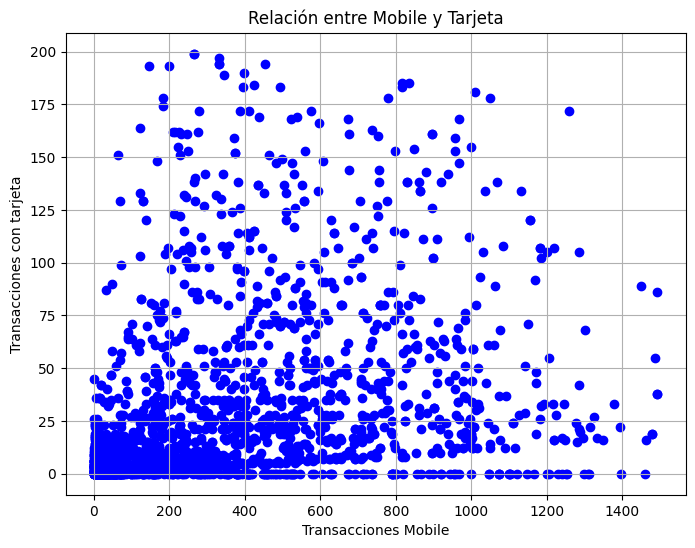

In [97]:
#4.	Genera un gráfico para identificar cualquier relación entre la cantidad de 
# transacciones en el canal móvil y con tarjeta de crédito. (6 Puntos)

#un gráfico de dispersión sería lo ideal

x = df['Cant_Trx_Movil']
y = df['Cant_Trx_Card']

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', marker='o')  # Scatter plot
plt.title('Relación entre Mobile y Tarjeta')
plt.xlabel('Transacciones Mobile')
plt.ylabel('Transacciones con tarjeta')
plt.grid(True)
plt.show()

#la relación de ambas acciones no es tan lineal, pero sí tiene mucha correlación ya que se 
# ve un patrón que entre menos transacciones de ambas formas en cantidades menores a 600

In [99]:
#3.	Identifica el nivel de educación con mayor transaccionalidad en 
#promedio e Identifica el estado civil con menor transaccionalidad en promedio. (6 Puntos)

#aquí sería ideal un gráfico circular en el que conste el promedio de una la columna 
#transaccionalidad (que es la suma de ambas formas: tarjeta y mobile)

df["Education"]


df["Marital_Status"]




0       Divorced
1         Single
2        Married
3       Together
4         Single
          ...   
2235    Divorced
2236     Married
2237    Divorced
2238     Married
2239     Married
Name: Marital_Status, Length: 2240, dtype: object